In [1]:
import OctaDist.octadist as oc
from main.svc_materials import q2D_creator
from main.svc_materials import q2D_analysis

In [2]:
############  EXAMPLE ############
P1 = "0.71589 3.64818 11.65174"
P2 = "-1.90768 5.12176 0.44573"
P3 = "-0.72852 4.82914 17.88274"
Q1 = "4.94461 0.14891 17.98153"
Q2 = "3.67367 -0.62894 17.89210"
Q3 = "2.48304 -0.85654 0.46051"

mol_file ='Examples/phenyl_m2.mol2' # Molecule file, it could be a mol2 or xyz file
perov_file ='Examples/H6PbCI3N_natural.vasp' # This need to be a .vasp file with cartesian coordinates, in future version we would take more formats.

mol = q2D_creator(B='Pb',X='I', # B is the metal center and X are the octahedra vertex elements
                  molecule_xyz=mol_file, # Molecule path
                  perov_vasp=perov_file, # Perovskite path
                  P1=P1,P2=P2, P3=P3, Q1= Q1, Q2=Q2, Q3=Q3, # Desired positions to put the organic molecule in the perovskite
                  name='Phenyl_PbI', # Name of the system, is used save the files 
                  vac=10 # Amount of vacuum in Z direction for the SVC
                  )

mol.show_bulk(slab=1, hn=0.3) # Slab is the number of perovskite slabs, and hn is the penetration of the molecule in the slab
mol.show_svc()
mol.show_iso()
#mol.write_iso() 
#mol.write_svc()
mol.write_bulk(slab=1, hn=0.3, order=['N', 'C', 'H', 'I', 'Pb']) # Order specify the desired element order in the .vasp file

Working
Hey


/home/pollofrito/anaconda3/envs/MAESTRA/lib/python3.8/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(obj)
/home/pollofrito/anaconda3/envs/MAESTRA/lib/python3.8/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(obj)
/home/pollofrito/anaconda3/envs/MAESTRA/lib/python3.8/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [3]:
path_result = 'Examples/bulk_Phenyl_PbI.vasp' # This must be a .vasp file in cartesian.

q2D = q2D_analysis(B='Pb', X='I', crystal=path_result) # Create the analysis class
# ISOLATE SPACER SVC (SALT)
q2D.isolate_spacer() # This write the new SVC salt structure in a .vasp file
# OCTAHEDRA
# Cell cutoff in to complate the octahedra in PBC, change it to 1 if you have problems,
# if the cell is to big it would cost more resources default is 0.5 (half cell).
# bon_cutoff is the max distance radii it would search for neighbors in the octahedra default is 3.5 A
prop_df, octa_dict = q2D.octahedra(cell_cutoff=0.5, bond_cutoff=3.5)

1
Your isolated salt file was save as:  Examples/salt_bulk_Phenyl_PbI.vasp
B:X proportion =  12.8


/home/pollofrito/Documents/SVC/DEVELOP/SVC-Materials/SVC-Materials/main/svc_materials.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MP.sort_values('Element', inplace=True)


## Plots:
We would show how to use the OctaDist to plot different interesting representations.

In [4]:
prop_df # The properties dataframe is useful to select the desired octahedra


,Element,X,Y,Z,d_mean,Zeta,Delta,Sigma,theta,theta_min,theta_max
34,Pb,8.556726,9.250460,19.303887,3.257456,0.019787,0.000001,46.537030,131.332998,101.645317,161.020679
35,Pb,12.835089,13.875690,19.303887,3.257456,0.019787,0.000001,46.536995,131.332895,101.645249,161.020541
46,Pb,8.556726,18.500919,19.303887,3.257456,0.019787,0.000001,46.537030,131.332998,101.645317,161.020679
60,Pb,17.113453,9.250460,19.303887,3.257456,0.019787,0.000001,46.537030,131.332998,101.645317,161.020679
66,Pb,17.113453,18.500919,19.303887,3.257456,0.019787,0.000001,46.537030,131.332998,101.645317,161.020679


In [27]:
# Lets see how to use the octa_dict:
# For the first octahedra can be accesed with the indx of the prop_df
atom = octa_dict[34]['atom'] # atoms are stored in atoms
coord = octa_dict[34]['coord'] # coord are stored in coord
test = oc.src.draw.DrawComplex_Plotly(atom=atom, coord=coord, cutoff_global=3.5)
test.add_atom()
test.add_bond()
test.show_plot()

<Figure size 640x480 with 0 Axes>

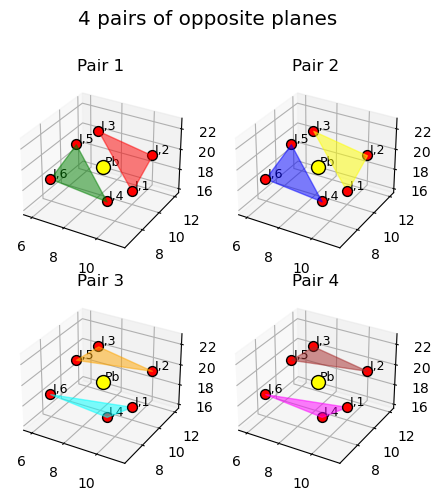

In [14]:
atom = octa_dict[34]['atom'] # atoms are stored in atoms
coord = octa_dict[34]['coord'] # coord are stored in coord
# Draw the structure
test = oc.src.draw.DrawProjection(atom=atom, coord=coord)
test.add_atom()
test.add_symbol()
test.add_plane()
test.show_plot()

/home/pollofrito/Documents/SVC/DEVELOP/Maestra/MAIN/SVC-Maestra/OctaDist/octadist/src/draw.py:969: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  self.all_ax[i].plot(x, y, z, "k-", color="black")
/home/pollofrito/Documents/SVC/DEVELOP/Maestra/MAIN/SVC-Maestra/OctaDist/octadist/src/draw.py:975: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k->" (-> color='k'). The keyword argument will take precedence.
  self.all_ax[i].plot(x, y, z, "k->", color="black")


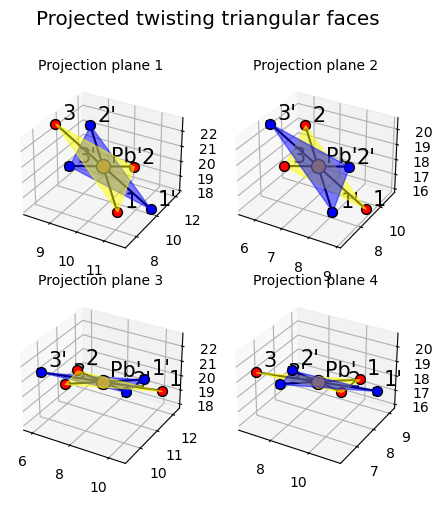

In [15]:
atom = octa_dict[34]['atom'] # atoms are stored in atoms
coord = octa_dict[34]['coord'] # coord are stored in coord
# Draw the structure
test = oc.src.draw.DrawTwistingPlane(atom=atom, coord=coord)
test.add_plane()
test.add_symbol()
test.add_bond()
test.show_plot()